In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_openml

from embedding_encoder import EmbeddingEncoder


X, y = fetch_openml("titanic", version=1, return_X_y=True, as_frame=True)
X = X.drop(["name", "ticket", "cabin", "boat", "body"], axis=1)
y = y.reindex(X.index).astype(int)
numeric_vars = ["age", "fare"]
categorical_vars = ["sex", "pclass", "parch", "embarked"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [2]:
ee = EmbeddingEncoder(task="classification", epochs=10)
num_pipe = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())
cat_pipe = make_pipeline(SimpleImputer(strategy="most_frequent"), ee)
col_transformer = ColumnTransformer([("num_transformer", num_pipe, numeric_vars),
                                     ("cat_transformer", cat_pipe, categorical_vars)])

pipe = make_pipeline(col_transformer,
                     LogisticRegression())

cv_score = cross_val_score(pipe, X_train, y_train, cv=3)
print(f"Mean score: {cv_score.mean():.2f} ({cv_score.std():.2f})")

Mean score: 0.78 (0.01)


In [3]:
from embedding_encoder.utils import ColumnTransformerWithNames

ee = EmbeddingEncoder(task="classification", numeric_vars=numeric_vars,
                      epochs=10)
num_pipe = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())
cat_transformer = SimpleImputer(strategy="most_frequent")
col_transformer = ColumnTransformerWithNames([("num_transformer", num_pipe, numeric_vars),
                                              ("cat_transformer", cat_transformer, categorical_vars)])

pipe = make_pipeline(col_transformer,
                     ee,
                     LogisticRegression())

pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7862595419847328

<AxesSubplot:title={'center':"PCA embeddings projection for variable 'parch'"}, xlabel='Component 0', ylabel='Component 1'>

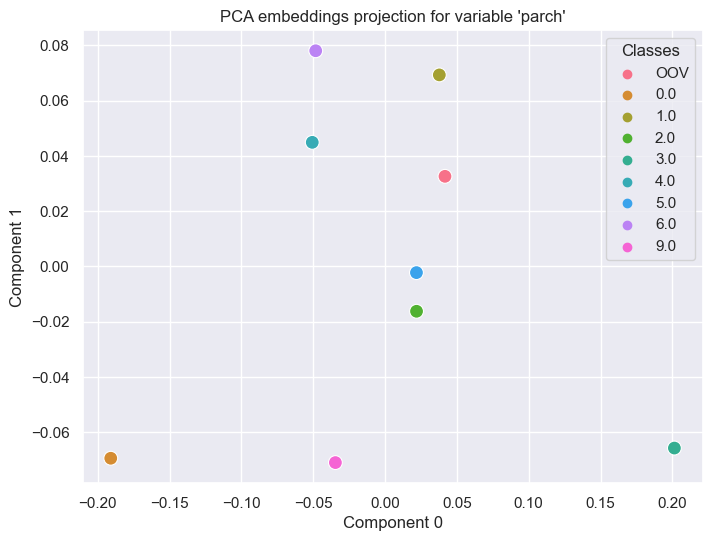

In [4]:
from embedding_encoder.utils import plot_embeddings

plot_embeddings(ee, variable="parch", model="pca")